In [9]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [10]:
latitude=37.983810 
longitude=23.727539
surface_tilt=0 
surface_azimuth=180
module_name = 'Canadian_Solar_CS5P_220M___2009_'
inverter_name = 'Power_Electronics__FS3000CU15__690V_' #'ABB__PVS980_58_2000kVA_K__660V_' #'ABB__ULTRA_1100_TL_OUTD_2_US_690_x_y_z__690V_'
location=Location(latitude, longitude, tz='Europe/Athens', altitude=100)


In [11]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod') 
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules[module_name]
inverter = sapm_inverters[inverter_name]
temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [12]:
system=PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                module_parameters=module, inverter_parameters=inverter,
                temperature_model_parameters=temperature_model_parameters,
                modules_per_string=40, strings_per_inverter=250
                )
modelchain=ModelChain(system, location)

In [13]:
data=pd.read_csv('pvgis_tmy.csv', index_col=0)
data.index=pd.to_datetime(data.index)

In [14]:
modelchain.run_model(data)
solar_data=modelchain.results.ac
solar_data=pd.DataFrame(solar_data, columns=(['GR_solar_generation']))

solar_data.loc[solar_data['GR_solar_generation'] < 0, 'GR_solar_generation'] = 0
solar_data/=1000000/2
solar_data.to_csv('solar_data.csv', index_label=['Datetime'])

In [15]:
solar_data.head(20)
# solar_data
solar_data.describe()

,GR_solar_generation
count,52560.000000
mean,0.785125
std,1.132848
min,0.000000
25%,0.000000
50%,0.000000
75%,1.547656
max,3.758039


<Axes: >

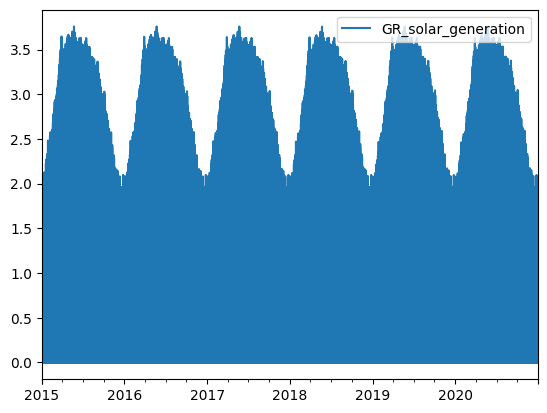

In [16]:
solar_data.plot()